# Test File

This is our environment to test out ideas for the project.

In [1]:
# Install required packages
!pip install sentence-transformers umap-learn plotly pandas matplotlib seaborn wordcloud

  Using cached wordcloud-1.9.4-cp313-cp313-macosx_11_0_arm64.whl.metadata (3.4 kB)
Using cached wordcloud-1.9.4-cp313-cp313-macosx_11_0_arm64.whl (167 kB)


In [2]:
import pandas as pd
from sentence_transformers import SentenceTransformer
import umap
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from wordcloud import WordCloud
import ast

/Users/michelledavies/Library/CloudStorage/GoogleDrive-chelle.davies@berkeley.edu/My Drive/DATASCI 266/datasci266-NER-project/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Import the dataset
df = pd.read_csv('../data/4698969/Dataset_updated.csv')
df = df.dropna()
df = df.drop_duplicates()
df = df.reset_index(drop=True)
df.head()

,ID,Date,Author,Likes,Replies,Comment,Relevance,Polarity,Feature request,Problem report,Efficiency,Safety,tokens,labels,num_tokens,has_entity,entity_tokens,combined_labels_str
0,UghhPYDEB6B173gCoAEC,2017-04-28T18:12:45Z,Aaron Brown,1679,30,i want what he's smoking,spam,neutral,False,False,False,false,"['i', 'want', 'what', 'he', ""'s"", 'smoking']","['spam', 'neutral', False, False, False, 'false']",6,True,"['i', 'want', 'what', 'he', ""'s"", 'smoking']","False, False, False, false, neutral, spam"
1,Ugh6WAPQinruAHgCoAEC,2017-04-28T18:15:14Z,Felician Cadar,684,22,I love how Musk always makes seemingly wild cl...,spam,positive,False,False,False,false,"['I', 'love', 'how', 'Musk', 'always', 'makes'...","['spam', 'positive', False, False, False, 'fal...",23,True,"['I', 'love', 'how', 'Musk', 'always', 'makes']","False, False, False, false, positive, spam"
2,Ugj9xobHmVeDEHgCoAEC,2017-04-28T18:24:53Z,Kelvin Yang,0,0,No.3,spam,neutral,False,False,False,false,['No.3'],"['spam', 'neutral', False, False, False, 'false']",1,True,['No.3'],"False, False, False, false, neutral, spam"
3,Ugj39PRg5dVn8XgCoAEC,2017-04-28T18:25:31Z,Kelvin Yang,140,4,Could be the start of a historical company,spam,neutral,False,False,False,false,"['Could', 'be', 'the', 'start', 'of', 'a', 'hi...","['spam', 'neutral', False, False, False, 'false']",8,True,"['Could', 'be', 'the', 'start', 'of', 'a']","False, False, False, false, neutral, spam"
4,Ugiu9jMmiWts1HgCoAEC,2017-04-28T18:31:52Z,serendipity42,675,9,Gotta start somewhere before making tunnels on...,spam,neutral,False,False,False,false,"['Got', 'ta', 'start', 'somewhere', 'before', ...","['spam', 'neutral', False, False, False, 'false']",9,True,"['Got', 'ta', 'start', 'somewhere', 'before', ...","False, False, False, false, neutral, spam"


In [4]:
# Extract the comments from the DataFrame
comments = df["Comment"].fillna("").tolist()

In [5]:
# Generate SBERT embeddings
model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode(comments, show_progress_bar=True)

Batches: 100%|██████████| 134/134 [00:04<00:00, 30.96it/s]


In [6]:
# Reduce dimensions with UMAP
umap_model = umap.UMAP(n_neighbors=15, n_components=2, metric='cosine', random_state=42)
embedding_2d = umap_model.fit_transform(embeddings)

/Users/michelledavies/Library/CloudStorage/GoogleDrive-chelle.davies@berkeley.edu/My Drive/DATASCI 266/datasci266-NER-project/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/michelledavies/Library/CloudStorage/GoogleDrive-chelle.davies@berkeley.edu/My Drive/DATASCI 266/datasci266-NER-project/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [7]:
# Add 2D coordinates to dataframe
df["umap_x"] = embedding_2d[:, 0]
df["umap_y"] = embedding_2d[:, 1]

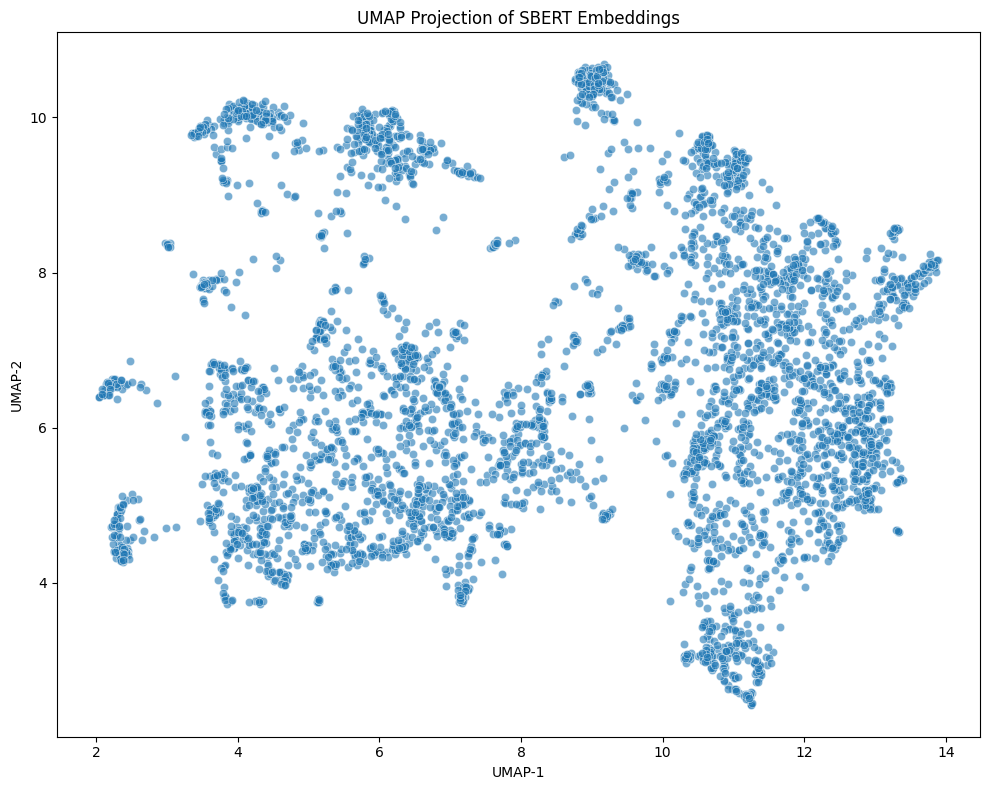

In [8]:
# Plot interactive scatter plot with tooltips
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x="umap_x", y="umap_y", alpha=0.6)
plt.title("UMAP Projection of SBERT Embeddings")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.tight_layout()
plt.show()

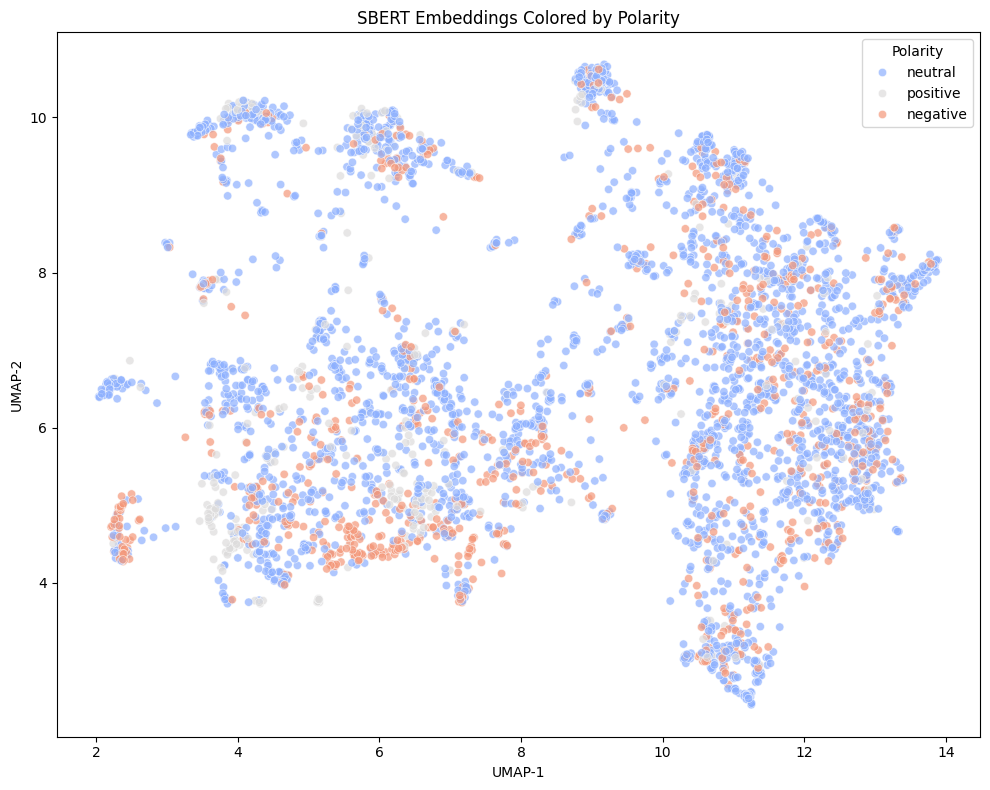

In [9]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x="umap_x", y="umap_y", hue="Polarity", palette="coolwarm", alpha=0.7)
plt.title("SBERT Embeddings Colored by Polarity")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.legend(title="Polarity")
plt.tight_layout()
plt.show()

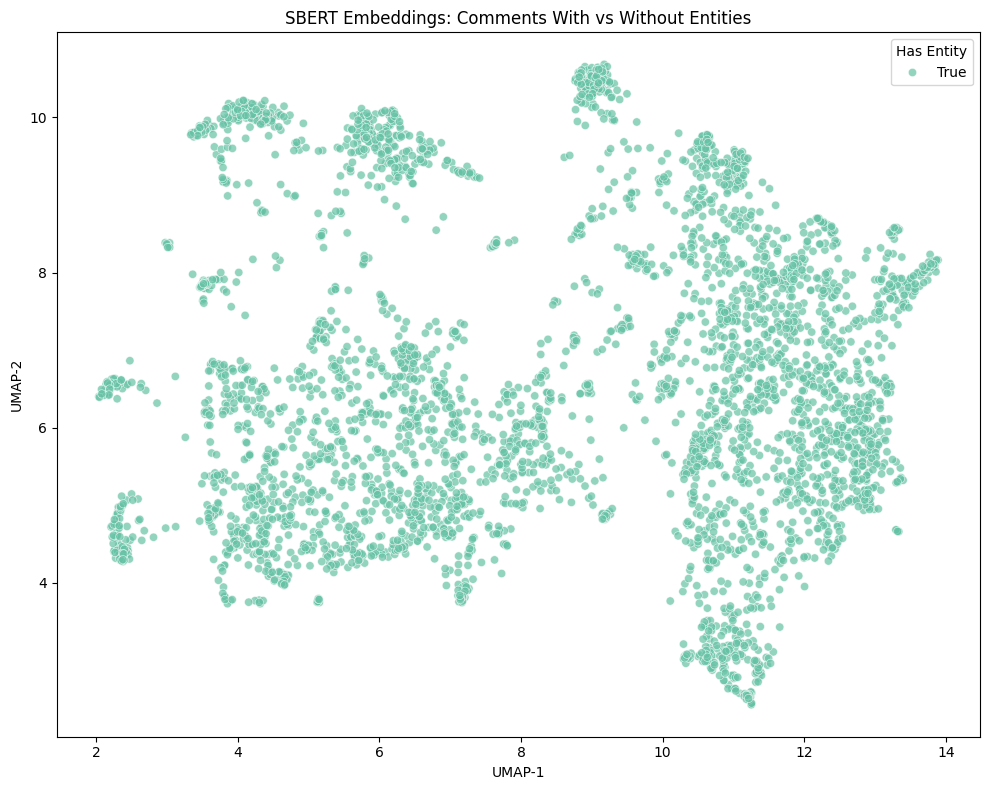

In [10]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x="umap_x", y="umap_y", hue="has_entity", palette="Set2", alpha=0.7)
plt.title("SBERT Embeddings: Comments With vs Without Entities")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.legend(title="Has Entity")
plt.tight_layout()
plt.show()


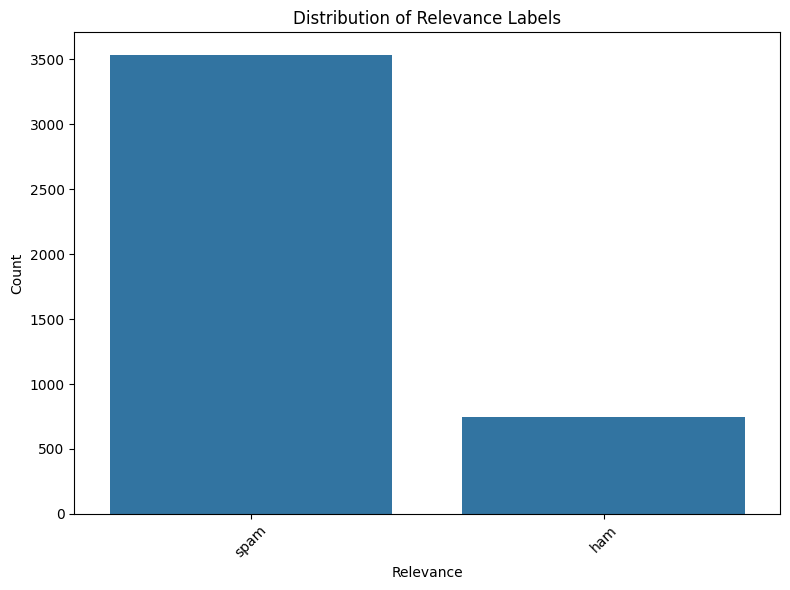

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Relevance", order=df["Relevance"].value_counts().index)
plt.title("Distribution of Relevance Labels")
plt.xlabel("Relevance")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
# Select a sample (e.g., top 20 comments with entities)
sample_df = df[df["has_entity"] == True].sample(20, random_state=42)
sample_embeddings = model.encode(sample_df["Comment"].tolist())
similarity_matrix = cosine_similarity(sample_embeddings)

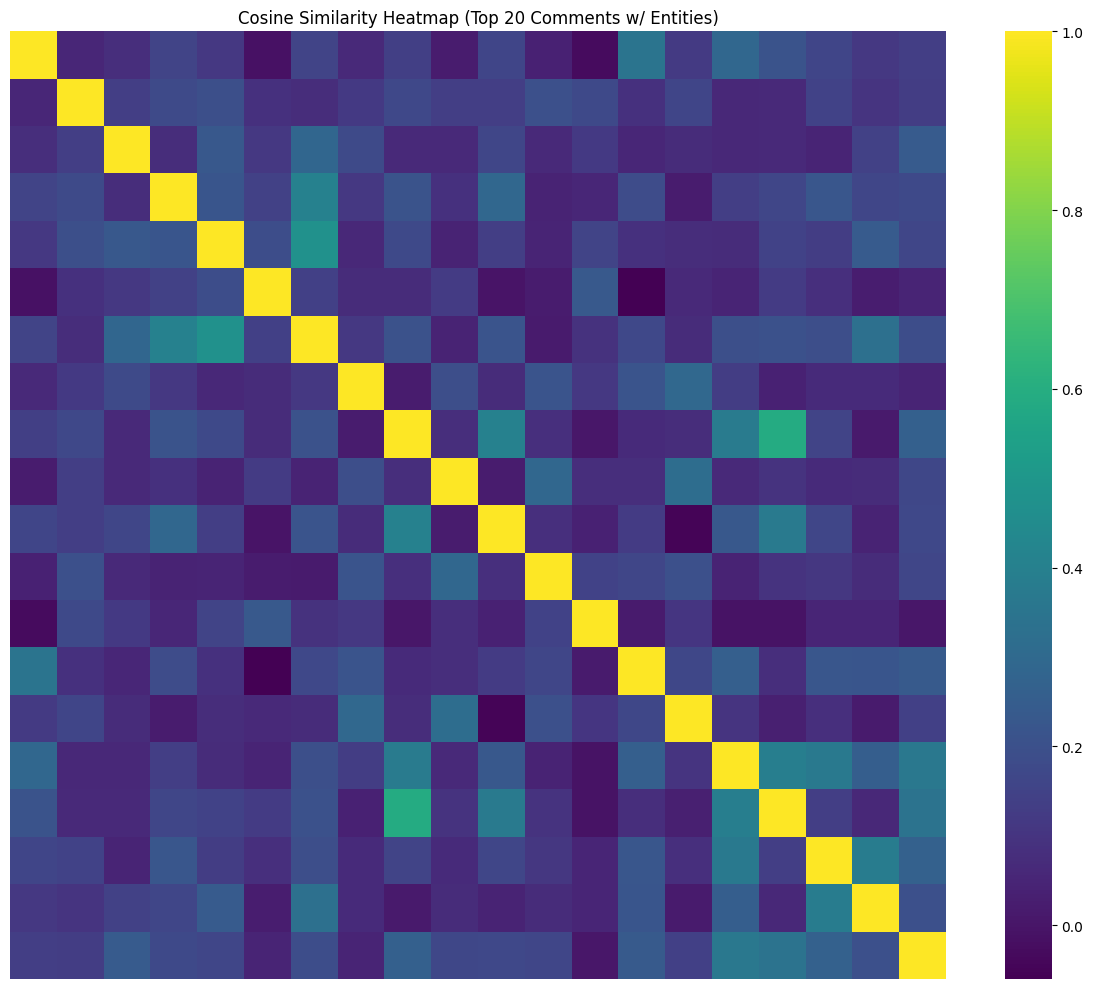

In [13]:
# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(similarity_matrix, xticklabels=False, yticklabels=False, cmap='viridis')
plt.title("Cosine Similarity Heatmap (Top 20 Comments w/ Entities)")
plt.tight_layout()
plt.show()

In [14]:
df["comment_length"] = df["Comment"].fillna("").apply(lambda x: len(x.split()))

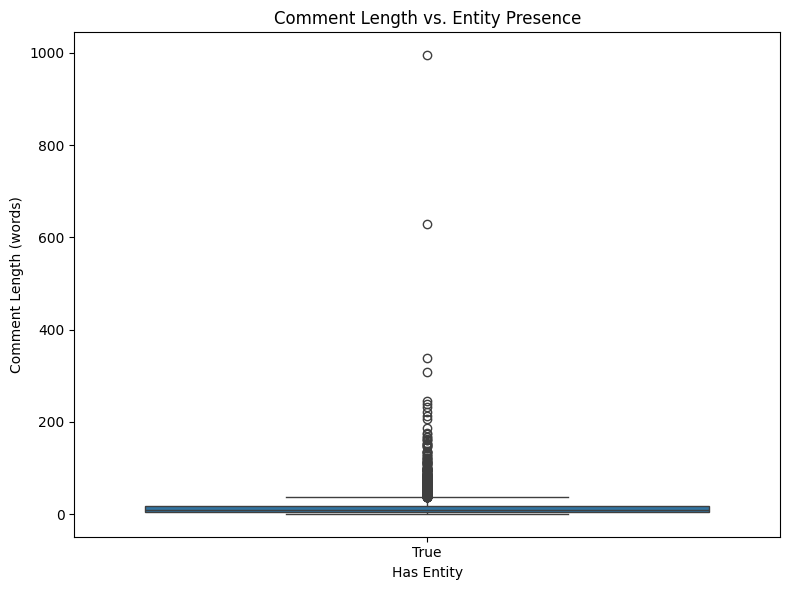

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="has_entity", y="comment_length", data=df)
plt.title("Comment Length vs. Entity Presence")
plt.xlabel("Has Entity")
plt.ylabel("Comment Length (words)")
plt.tight_layout()
plt.show()

In [16]:
all_entities = []
for token_list in df["entity_tokens"].dropna():
    try:
        all_entities.extend(ast.literal_eval(token_list))
    except:
        pass
text_blob = " ".join(all_entities)

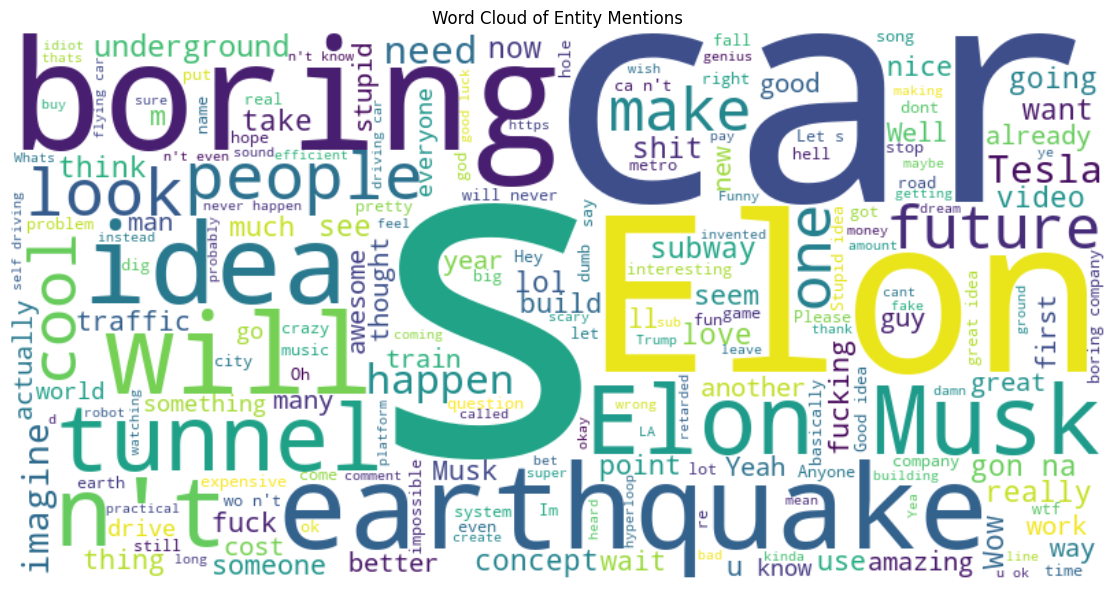

In [17]:
# Generate and plot word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_blob)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Entity Mentions")
plt.tight_layout()
plt.show()